In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data split approach
from sklearn.model_selection import train_test_split

# normalização dos dados
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# lendo os dados e deixando 'Data' como index
dados = pd.DataFrame.from_dict(pd.read_csv('data/Consumo_cerveja.csv',index_col='Data',parse_dates=True))
dados.columns = dados.columns.str.replace(' ','_')
dados.columns = dados.columns.str.replace('[)(]' ,'')
# dropando linhas NaN
dados.dropna(inplace=True)
# trocando virgula por ponto em todas as colunas
dados['Temperatura_Media_C'] = pd.to_numeric(dados['Temperatura_Media_C'].str.replace(',', '.'))
dados['Temperatura_Minima_C'] = pd.to_numeric(dados['Temperatura_Minima_C'].str.replace(',', '.'))
dados['Temperatura_Maxima_C'] = pd.to_numeric(dados['Temperatura_Maxima_C'].str.replace(',', '.'))
dados['Precipitacao_mm'] = pd.to_numeric(dados['Precipitacao_mm'].str.replace(',', '.'))
dados['Final_de_Semana'] = dados['Final_de_Semana'].astype(int)
# mostrando os 5 primeiros
display(dados.columns)
display(dados.head())
dados.describe()

Index(['Temperatura_Media_C', 'Temperatura_Minima_C', 'Temperatura_Maxima_C',
       'Precipitacao_mm', 'Final_de_Semana', 'Consumo_de_cerveja_litros'],
      dtype='object')

,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
Data,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0,25.461
2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2015-01-03,24.82,22.4,29.9,0.0,1,30.814
2015-01-04,23.98,21.5,28.6,1.2,1,29.799
2015-01-05,23.82,21.0,28.3,0.0,0,28.900


,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


Text(0, 0.5, 'Consumo de Cerveja (litros)')

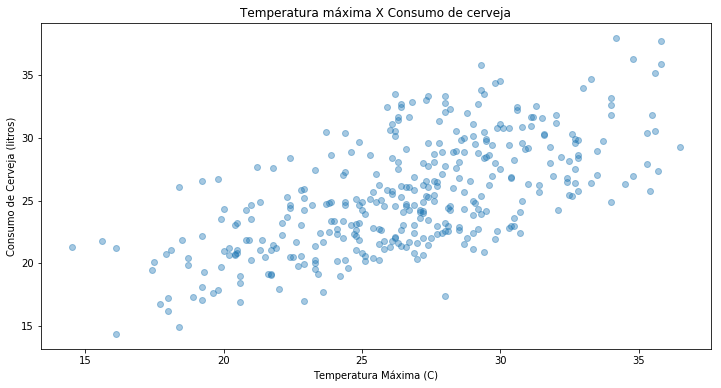

In [2]:
# verificando pontos
plt.figure(figsize=(12,6))
plt.title('Temperatura máxima X Consumo de cerveja')
plt.scatter(dados['Temperatura_Maxima_C'],dados['Consumo_de_cerveja_litros'], alpha=0.4)
plt.xlabel('Temperatura Máxima (C)')
plt.ylabel('Consumo de Cerveja (litros)')

In [3]:
# numero indice colunas
ind = np.arange(1)
width = 0.35

# pegando apenas dados do final de semana
dados_means_fds = dados[dados['Final_de_Semana'] == 1]

# média consumo final de semana - fds
consumo_means_fds = dados_means_fds['Consumo_de_cerveja_litros'].mean()

# desvio padrao consumo final de semana - fds
consumo_std_fds = dados_means_fds['Consumo_de_cerveja_litros'].std()

# pegando apenas dados do meio de semana - mds
dados_means_mds = dados[dados['Final_de_Semana'] == 0]

# media consumo meio de semana - mds
consumo_means_mds = dados_means_mds['Consumo_de_cerveja_litros'].mean()

# desvio meio de semana - mds
consumo_std_mds = dados_means_mds['Consumo_de_cerveja_litros'].std()

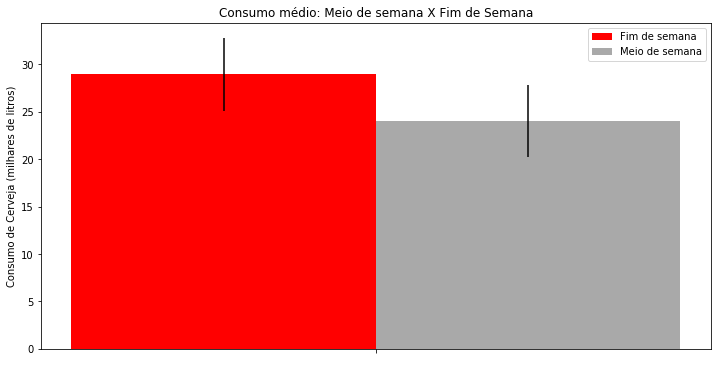

In [4]:
# grafico analisando consumo médio
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(ind - width/2, consumo_means_fds, width, yerr=consumo_std_fds,
                color='red', label='Fim de semana')
rects2 = ax.bar(ind + width/2, consumo_means_mds, width, yerr=consumo_std_mds,
                color='darkgrey', label='Meio de semana')

# Rótulos e títulos
ax.set_ylabel('Consumo de Cerveja (milhares de litros)')
ax.set_title('Consumo médio: Meio de semana X Fim de Semana')
ax.set_xticks(ind)
ax.set_xticklabels((' '))
ax.legend()

In [5]:
X = np.array(dados[['Temperatura_Maxima_C','Temperatura_Media_C','Temperatura_Minima_C','Final_de_Semana']])
y = np.array(dados['Consumo_de_cerveja_litros'])

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# normaliza os dados de treino
scaler = Normalizer().fit(X_train)
dataset = scaler.transform(X_train)

display(dataset)

# criando modelo
#model = Ridge(alpha=1)
model = GaussianNB()

# treinando modelo
#model.fit(X_train,y_train)

# realizando as predições
#y_pred = model.predict(X_test)

#print("Score ->",r2_score(y_test, y_pred))

# printando os scores e o MAE
#print("Acurácia treino: ",model.score(X_train,y_train))
#print("Acurácia teste: ",model.score(X_test,y_test))
#print("Diferença média absoluta:",mean_absolute_error(y_test,y_pred))

array([[0.72926691, 0.52996725, 0.43206567, 0.02497489],
       [0.72339105, 0.55789583, 0.40593167, 0.02602126],
       [0.65624202, 0.55622   , 0.50986834, 0.        ],
       ...,
       [0.65839373, 0.55880476, 0.50347756, 0.0276636 ],
       [0.68640016, 0.54708132, 0.47912091, 0.        ],
       [0.68247871, 0.55494481, 0.47566698, 0.        ]])

In [ ]:
# Printando consumo real vs o consumo predito
for i,j in zip(y_test,y_pred):
    print("Consumo real: {:.2f}".format(i))
    print("Consumo predito: {:.2f}".format(j))
    print()